In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale
import pandas as pd
import random as rnd

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
init_price = 100.0
spread = 0.02
ps = []
ps.append(init_price)

In [3]:
# random walk
num_entries = 100000
for i in range(num_entries-1):
    ps.append( ps[-1] + round(rnd.normalvariate(0,1), 5) )

In [4]:
ps[0:5]

[100.0, 98.98783, 99.76215, 100.30106, 100.68894]

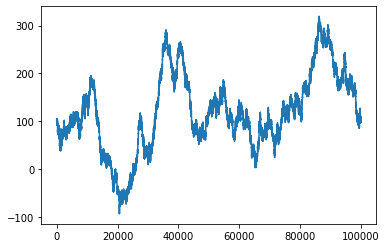

In [5]:
plot(ps);

In [6]:
dti = pd.date_range('2018-01-01', periods=num_entries, freq='Min')
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:01:00',
               '2018-01-01 00:02:00', '2018-01-01 00:03:00',
               '2018-01-01 00:04:00', '2018-01-01 00:05:00',
               '2018-01-01 00:06:00', '2018-01-01 00:07:00',
               '2018-01-01 00:08:00', '2018-01-01 00:09:00',
               ...
               '2018-03-11 10:30:00', '2018-03-11 10:31:00',
               '2018-03-11 10:32:00', '2018-03-11 10:33:00',
               '2018-03-11 10:34:00', '2018-03-11 10:35:00',
               '2018-03-11 10:36:00', '2018-03-11 10:37:00',
               '2018-03-11 10:38:00', '2018-03-11 10:39:00'],
              dtype='datetime64[ns]', length=100000, freq='T')

In [7]:
df = pd.DataFrame(data=ps, index=dti, columns=['Bid'])
df.head()

,Bid
2018-01-01 00:00:00,100.00000
2018-01-01 00:01:00,98.98783
2018-01-01 00:02:00,99.76215
2018-01-01 00:03:00,100.30106
2018-01-01 00:04:00,100.68894


In [8]:
df = df.resample('5Min').ohlc()
df['volume'] = 200000.0
df.head()

Bid                                     volume
                          open       high        low      close          
2018-01-01 00:00:00  100.00000  100.68894   98.98783  100.68894  200000.0
2018-01-01 00:05:00  101.59718  104.08501  101.59718  103.55963  200000.0
2018-01-01 00:10:00  104.22023  104.93412  103.62725  103.62725  200000.0
2018-01-01 00:15:00  103.14792  105.27208  102.46045  103.68357  200000.0
2018-01-01 00:20:00  103.72203  103.72203  101.09991  101.72490  200000.0

In [9]:
noise_datamatrix = df2dmat(df)

In [10]:
df = pd.read_csv('Coinbase_BTCUSD_1h.csv')
nd = []
for i,(d,o,h,l,c,v) in df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume BTC']].iterrows():
    ds = d.split(' ')[0].split('-')
    hs = d.split(' ')[1].split('-')[:-1]
    ds = [int(x) for x in ds]
    hs = [int(x) for x in hs]
    nd.append(ds + hs + [0,0] + [o,h,l,c,v])
datamatrix = DataMatrix()
for y,mn,d,hr,m,s, o,h,l,c,v in nd:
    datamatrix.add_row(DateTime(y,mn,d,hr,m,s), o,h,l,c,int(v))

In [11]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2019-06-13 12:00:00,8168.60,8198.38,8145.66,8176.02,269
2019-06-12 11:00:00,8176.02,8177.72,8122.00,8160.00,485
2019-06-12 10:00:00,8160.00,8160.00,8121.64,8154.99,306
2019-06-12 09:00:00,8154.99,8161.32,8115.72,8122.97,234
2019-06-12 08:00:00,8122.97,8175.00,8094.00,8171.30,603


In [12]:
len(datamatrix)

17078

In [13]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [14]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2019-06-13 12:00:00,8168.60,8198.38,8145.66,8176.02,269
2019-06-12 11:00:00,8176.02,8177.72,8122.00,8160.00,485
2019-06-12 10:00:00,8160.00,8160.00,8121.64,8154.99,306
2019-06-12 09:00:00,8154.99,8161.32,8115.72,8122.97,234
2019-06-12 08:00:00,8122.97,8175.00,8094.00,8171.30,603


In [15]:
len(datamatrix)

17078

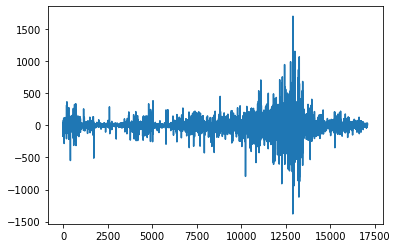

In [16]:
plot( np.diff(array(datamatrix.close)));

In [17]:
#datamatrix.dump_tsys("data.tsys")

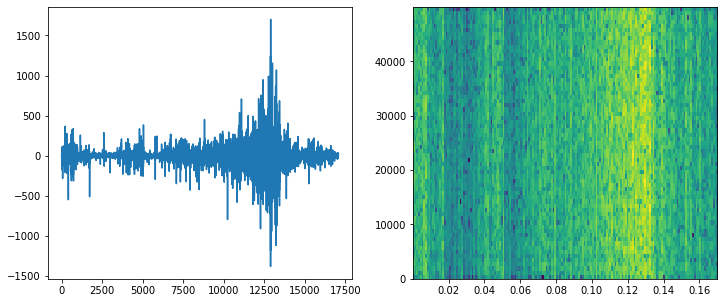

In [18]:
dt = 0.00001
x = np.diff(array(datamatrix.close)) 

NFFT = 128  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.plot(x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=32)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

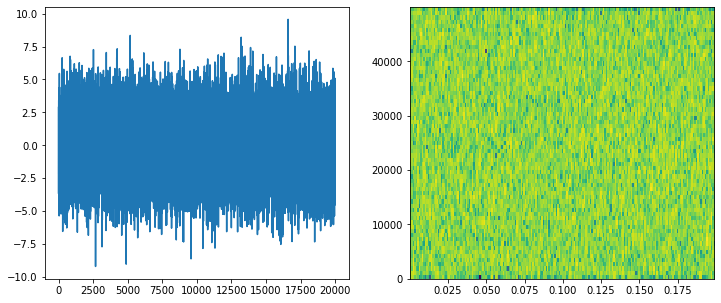

In [19]:
dt = 0.00001
xns = np.diff(array(noise_datamatrix.close))  

NFFT = 128  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.plot(xns)
Pxx, freqs, bins, im = ax2.specgram(xns, NFFT=NFFT, Fs=Fs, noverlap=32)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the matplotlib.image.AxesImage instance representing the data in the plot
plt.show()

In [20]:
# denoise 

import time
from datetime import timedelta as td
import librosa
import scipy

def _stft(y, n_fft, hop_length, win_length):
    return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)


def _istft(y, hop_length, win_length):
    return librosa.istft(y, hop_length, win_length)


def _amp_to_db(x):
    return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)


def _db_to_amp(x,):
    return librosa.core.db_to_amplitude(x, ref=1.0)


def plot_spectrogram(signal, title):
    fig, ax = plt.subplots(figsize=(20, 4))
    cax = ax.matshow(
        signal,
        origin="lower",
        aspect="auto",
        cmap=plt.cm.seismic,
        vmin=-1 * np.max(np.abs(signal)),
        vmax=np.max(np.abs(signal)),
    )
    fig.colorbar(cax)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


def plot_statistics_and_filter(
    mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
):
    fig, ax = plt.subplots(ncols=2, figsize=(20, 4))
    plt_mean, = ax[0].plot(mean_freq_noise, label="Mean power of noise")
    plt_std, = ax[0].plot(std_freq_noise, label="Std. power of noise")
    plt_std, = ax[0].plot(noise_thresh, label="Noise threshold (by frequency)")
    ax[0].set_title("Threshold for mask")
    ax[0].legend()
    cax = ax[1].matshow(smoothing_filter, origin="lower")
    fig.colorbar(cax)
    ax[1].set_title("Filter for smoothing Mask")
    plt.show()


def removeNoise(
    audio_clip,
    noise_clip,
    n_grad_freq=2,
    n_grad_time=4,
    n_fft=2048,
    win_length=2048,
    hop_length=512,
    n_std_thresh=1.5,
    prop_decrease=1.0,
    verbose=False,
    visual=False,
):
    """Remove noise from audio based upon a clip containing only noise

    Args:
        audio_clip (array): The first parameter.
        noise_clip (array): The second parameter.
        n_grad_freq (int): how many frequency channels to smooth over with the mask.
        n_grad_time (int): how many time channels to smooth over with the mask.
        n_fft (int): number audio of frames between STFT columns.
        win_length (int): Each frame of audio is windowed by `window()`. The window will be of length `win_length` and then padded with zeros to match `n_fft`..
        hop_length (int):number audio of frames between STFT columns.
        n_std_thresh (int): how many standard deviations louder than the mean dB of the noise (at each frequency level) to be considered signal
        prop_decrease (float): To what extent should you decrease noise (1 = all, 0 = none)
        visual (bool): Whether to plot the steps of the algorithm

    Returns:
        array: The recovered signal with noise subtracted

    """
    if verbose:
        start = time.time()
    # STFT over noise
    noise_stft = _stft(noise_clip, n_fft, hop_length, win_length)
    noise_stft_db = _amp_to_db(np.abs(noise_stft))  # convert to dB
    # Calculate statistics over noise
    mean_freq_noise = np.mean(noise_stft_db, axis=1)
    std_freq_noise = np.std(noise_stft_db, axis=1)
    noise_thresh = mean_freq_noise + std_freq_noise * n_std_thresh
    if verbose:
        print("STFT on noise:", td(seconds=time.time() - start))
        start = time.time()
    # STFT over signal
    if verbose:
        start = time.time()
    sig_stft = _stft(audio_clip, n_fft, hop_length, win_length)
    sig_stft_db = _amp_to_db(np.abs(sig_stft))
    if verbose:
        print("STFT on signal:", td(seconds=time.time() - start))
        start = time.time()
    # Calculate value to mask dB to
    mask_gain_dB = np.min(_amp_to_db(np.abs(sig_stft)))
    print(noise_thresh, mask_gain_dB)
    # Create a smoothing filter for the mask in time and frequency
    smoothing_filter = np.outer(
        np.concatenate(
            [
                np.linspace(0, 1, n_grad_freq + 1, endpoint=False),
                np.linspace(1, 0, n_grad_freq + 2),
            ]
        )[1:-1],
        np.concatenate(
            [
                np.linspace(0, 1, n_grad_time + 1, endpoint=False),
                np.linspace(1, 0, n_grad_time + 2),
            ]
        )[1:-1],
    )
    smoothing_filter = smoothing_filter / np.sum(smoothing_filter)
    # calculate the threshold for each frequency/time bin
    db_thresh = np.repeat(
        np.reshape(noise_thresh, [1, len(mean_freq_noise)]),
        np.shape(sig_stft_db)[1],
        axis=0,
    ).T
    # mask if the signal is above the threshold
    sig_mask = sig_stft_db < db_thresh
    if verbose:
        print("Masking:", td(seconds=time.time() - start))
        start = time.time()
    # convolve the mask with a smoothing filter
    sig_mask = scipy.signal.fftconvolve(sig_mask, smoothing_filter, mode="same")
    sig_mask = sig_mask * prop_decrease
    if verbose:
        print("Mask convolution:", td(seconds=time.time() - start))
        start = time.time()
    # mask the signal
    sig_stft_db_masked = (
        sig_stft_db * (1 - sig_mask)
        + np.ones(np.shape(mask_gain_dB)) * mask_gain_dB * sig_mask
    )  # mask real
    sig_imag_masked = np.imag(sig_stft) * (1 - sig_mask)
    sig_stft_amp = (_db_to_amp(sig_stft_db_masked) * np.sign(sig_stft)) + (
        1j * sig_imag_masked
    )
    if verbose:
        print("Mask application:", td(seconds=time.time() - start))
        start = time.time()
    # recover the signal
    recovered_signal = _istft(sig_stft_amp, hop_length, win_length)
    recovered_spec = _amp_to_db(
        np.abs(_stft(recovered_signal, n_fft, hop_length, win_length))
    )
    if verbose:
        print("Signal recovery:", td(seconds=time.time() - start))
    if visual:
        plot_spectrogram(noise_stft_db, title="Noise")
    if visual:
        plot_statistics_and_filter(
            mean_freq_noise, std_freq_noise, noise_thresh, smoothing_filter
        )
    if visual:
        plot_spectrogram(sig_stft_db, title="Signal")
    if visual:
        plot_spectrogram(sig_mask, title="Mask applied")
    if visual:
        plot_spectrogram(sig_stft_db_masked, title="Masked signal")
    if visual:
        plot_spectrogram(recovered_spec, title="Recovered spectrogram")
    return recovered_signal

STFT on noise: 0:00:00.002493
STFT on signal: 0:00:00.001554
[39.773754 35.93769  34.333336 36.109398 35.387657 35.419006 35.449978
 35.468483 34.55598  34.737488 35.498    35.46717  35.210003 35.89198
 34.425842 35.649048 36.322834 34.8454   34.523304 34.412914 34.92623
 34.847054 35.459972 35.233902 35.933517 36.33584  35.708183 35.539757
 35.444557 36.21356  34.527386 35.37551  34.971313 33.99675  34.18389
 34.73178  34.665543 35.335526 35.154247 36.142067 35.530872 35.47503
 34.993053 35.424446 34.853546 35.271465 36.187946 35.279    35.641144
 35.614277 34.574593 35.098515 35.508537 35.122517 34.87782  36.01481
 34.585976 35.766113 36.019955 35.3862   35.309242 35.76805  35.606167
 34.918983 35.938835 35.372894 34.800804 34.078777 34.752113 35.93821
 35.88323  36.13466  35.407276 37.085976 36.13101  36.590355 33.93868
 36.37219  36.062557 35.233227 34.914116 34.343666 35.74418  35.588844
 34.58779  35.46373  35.3698   36.006496 35.711937 35.25267  35.54367
 34.867374 35.32592  36.

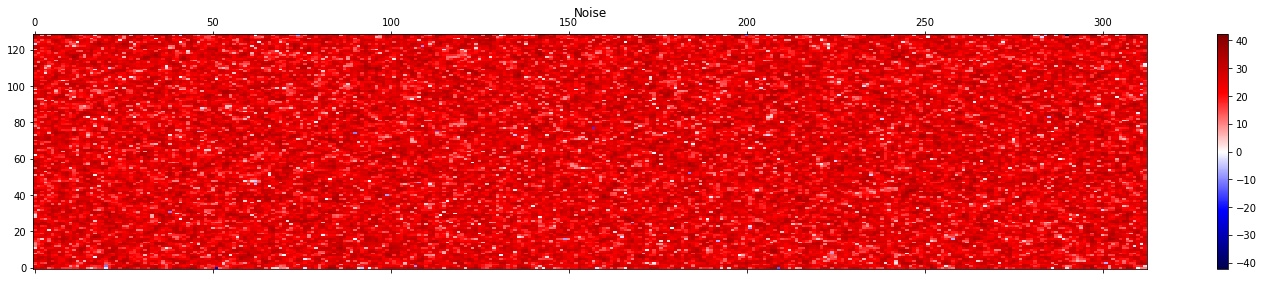

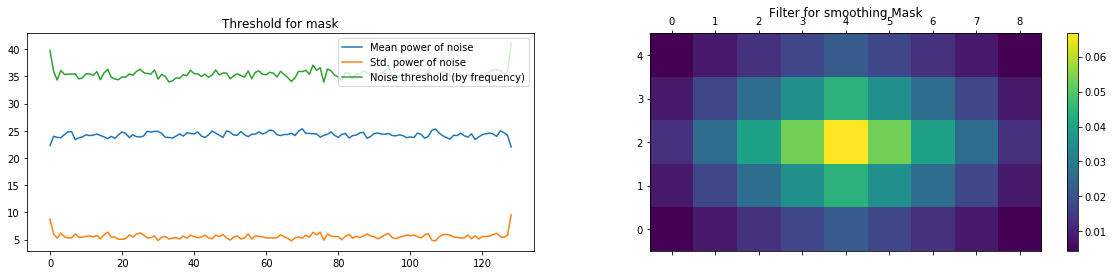

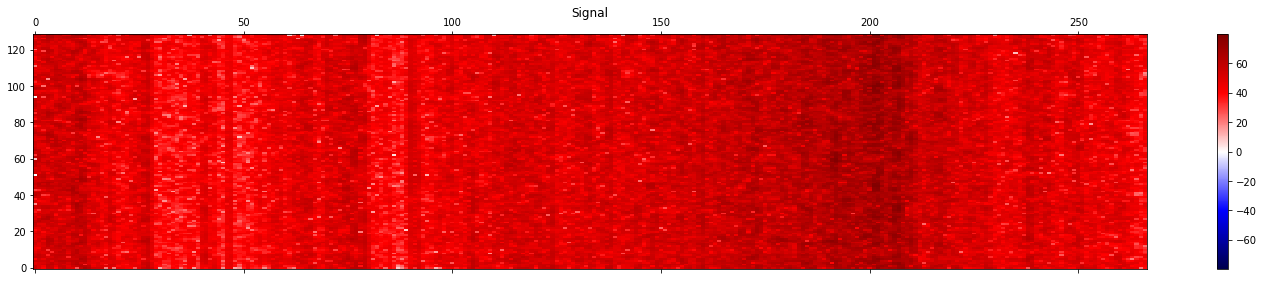

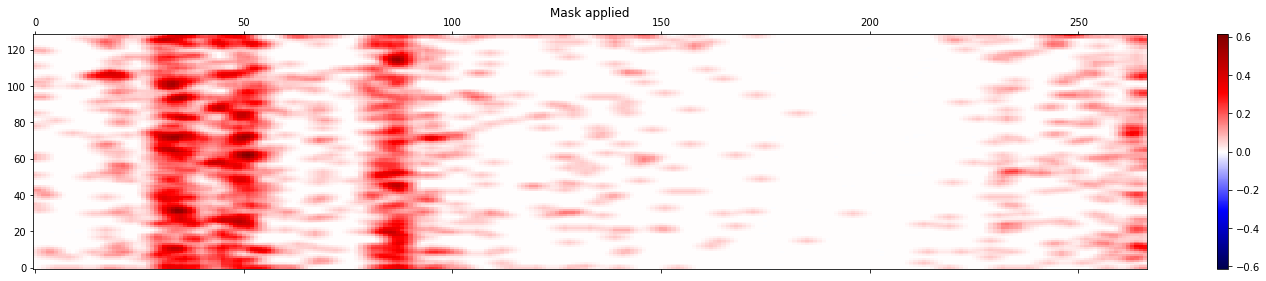

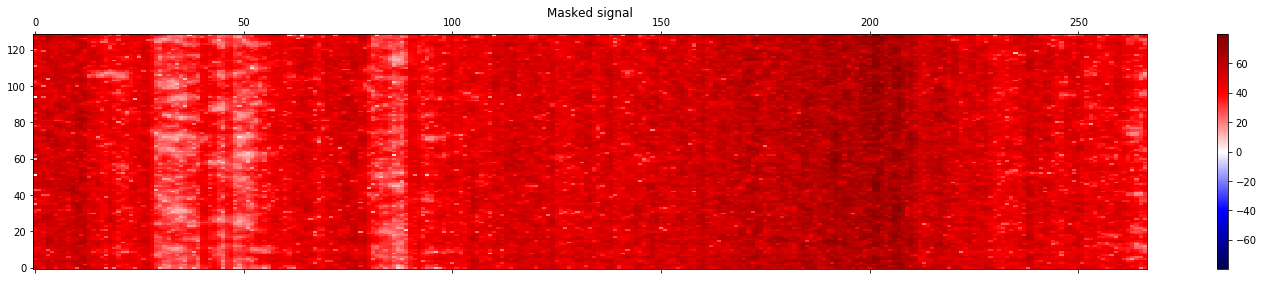

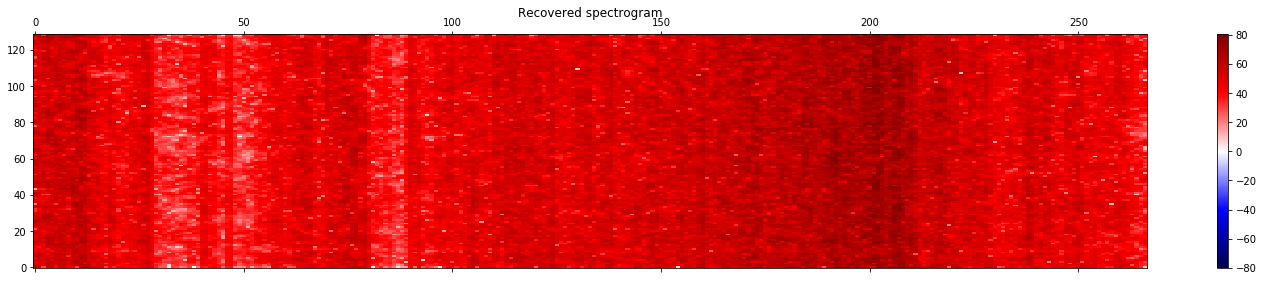

In [21]:
output = removeNoise(audio_clip=x.reshape(-1), noise_clip=xns, n_std_thresh=2, prop_decrease=1.0, 
                     n_fft=256, win_length=256, hop_length=64, 
                     verbose=True,visual=True)

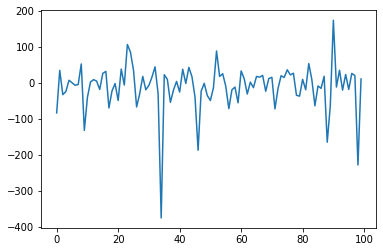

In [26]:
plot(output[10000:10100]);